## Airbnb DC Hosting Helper ##

## 4_eda_and_visualizations ##

### Summary ### 

In this notebook, I will be exploring the relationship between variables. This will help me understand the data more and know what to include to make strong models.

Import libraries and read in data

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [147]:
np.random.seed(100)

In [148]:
pd.set_option('display.max_columns', 300)

In [149]:
pd.set_option('display.max_rows', 300)

In [150]:
df = pd.read_csv('../data/final_df.csv')

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 100 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                3652 non-null   int64  
 1   id                                        3652 non-null   int64  
 2   name                                      3652 non-null   object 
 3   description                               3609 non-null   object 
 4   neighborhood_overview                     2794 non-null   object 
 5   host_id                                   3652 non-null   int64  
 6   host_about                                2529 non-null   object 
 7   host_response_time                        3652 non-null   object 
 8   host_response_rate                        3652 non-null   float64
 9   host_acceptance_rate                      3652 non-null   float64
 10  host_is_superhost                  

In [152]:
df.drop(columns = ['Unnamed: 0', 'id', 'host_id',  'amenities'
                  ], inplace=True)

Set color palette for graphs below.

In [145]:
sns.set_palette("pastel")

Explore neighborhood variables.

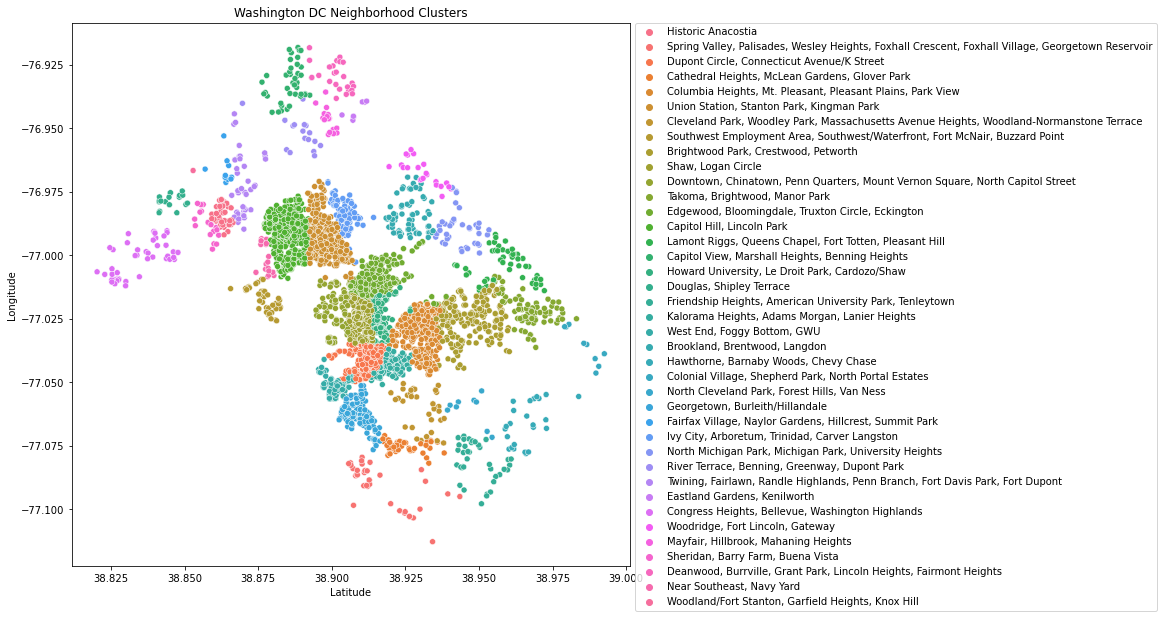

In [24]:
plt.figure(figsize=(10,10));
sns.scatterplot(x = 'latitude_x', y = 'longitude_x', hue='neighbourhood_cleansed', data =df);
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0);
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Washington DC Neighborhood Clusters");

Above, we see where listings are located in the differrent neighborhood clusters. 

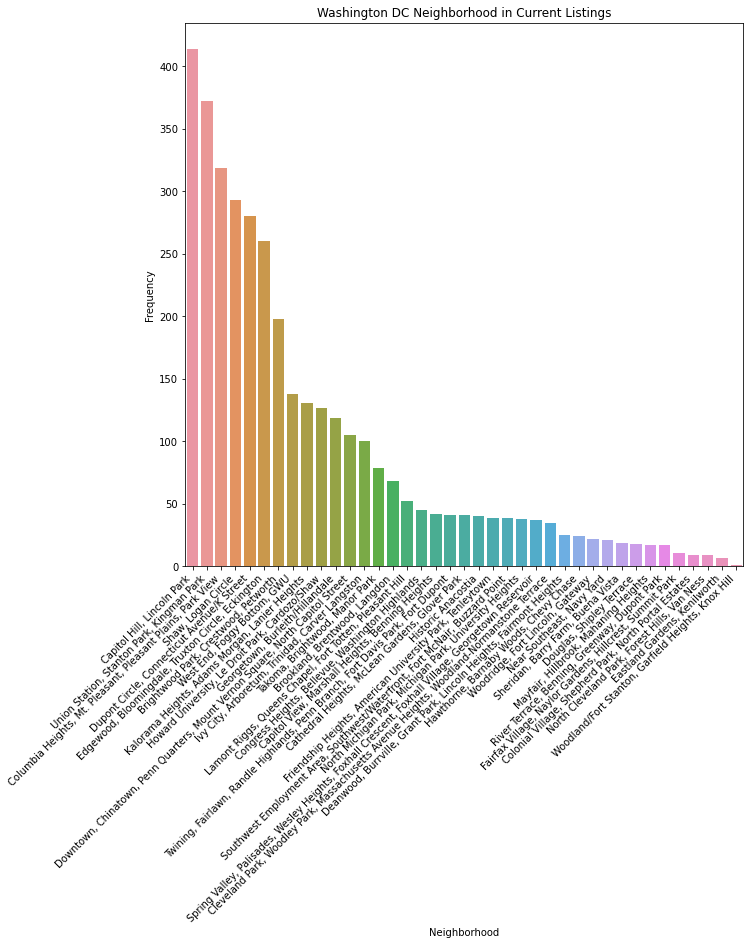

In [39]:
plt.figure(figsize=(10,10));
sns.countplot(x = df['neighbourhood_cleansed'], order = df['neighbourhood_cleansed'].value_counts().index );
plt.xticks(rotation=45, ha="right")
plt.xlabel("Neighborhood")
plt.ylabel("Frequency")
plt.title("Washington DC Neighborhood in Current Listings");

The above chart shows the frequency of listings in the DC neighbhorhoods. Capitol Hill, Union Station, Columbia Heights, Shaw and Dupont Circle are the 5 most frequent locations for listings. This makes sense, as these are some of the most populated and visited areas in DC.

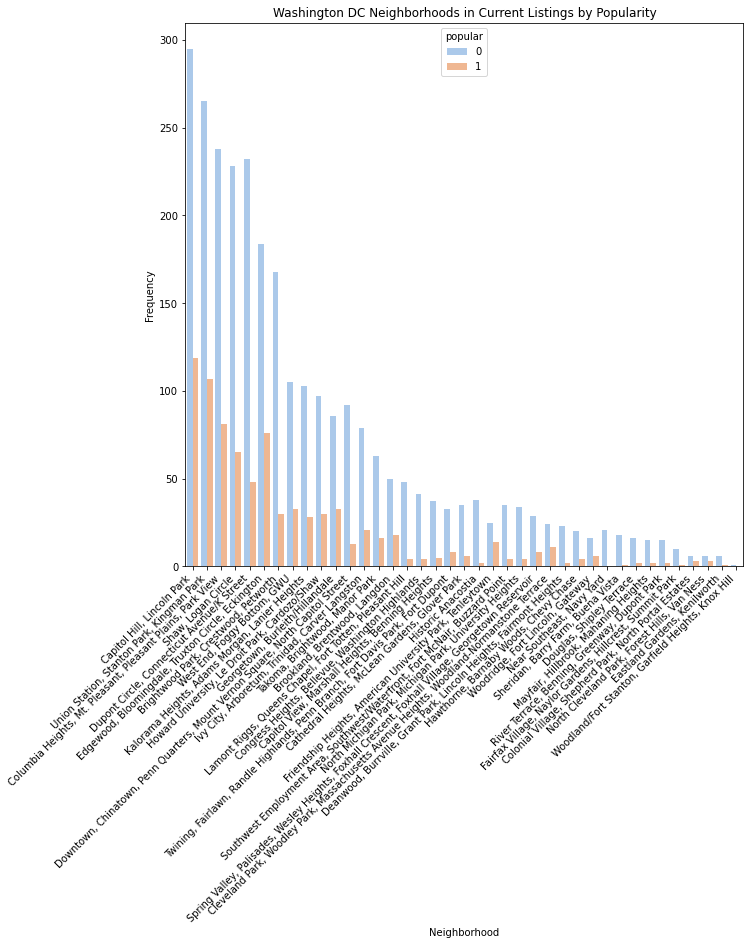

In [43]:
plt.figure(figsize=(10,10));
sns.countplot(x = df['neighbourhood_cleansed'], order = df['neighbourhood_cleansed'].value_counts().index, hue=df['popular'] );
plt.xticks(rotation=45, ha="right")
plt.xlabel("Neighborhood")
plt.ylabel("Frequency")
plt.title("Washington DC Neighborhoods in Current Listings by Popularity");

The above chart is similar to the one before, however it breaks out each neighborhood by showing the amount of 'popular' listings in each neighborhood. The majority of the top 5 neighborhoods most frequently listed also have the highest number of popular listings, however the 6th most frequently listed neighborhood, Edgewood, has more popular listings than Dupont Circle. Edgewood has a higher proportion of popular listings than most other neighborhoods. 

Below, I will explore variables by thier distributions with histograms.

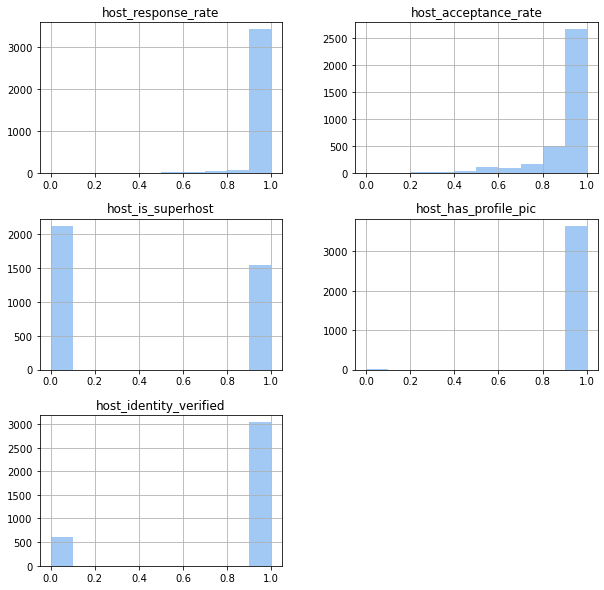

In [67]:
df.loc[:, 'host_response_time' : 'host_identity_verified'].hist(figsize=(10,10));

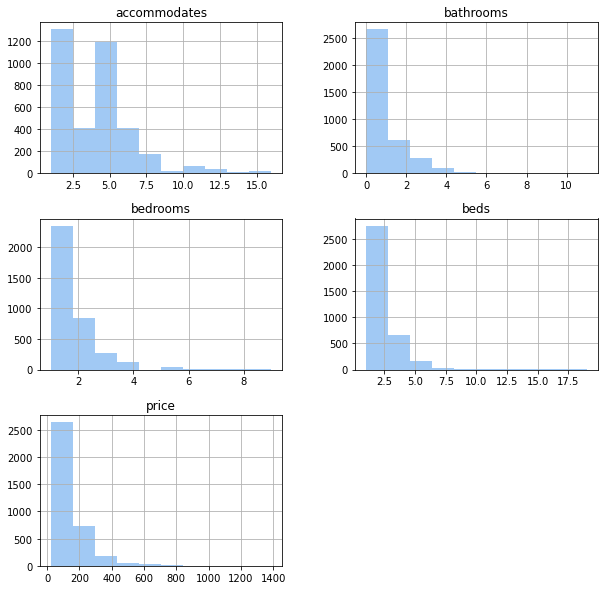

In [66]:
df.loc[:, 'room_type' : 'price'].hist(figsize=(10,10));

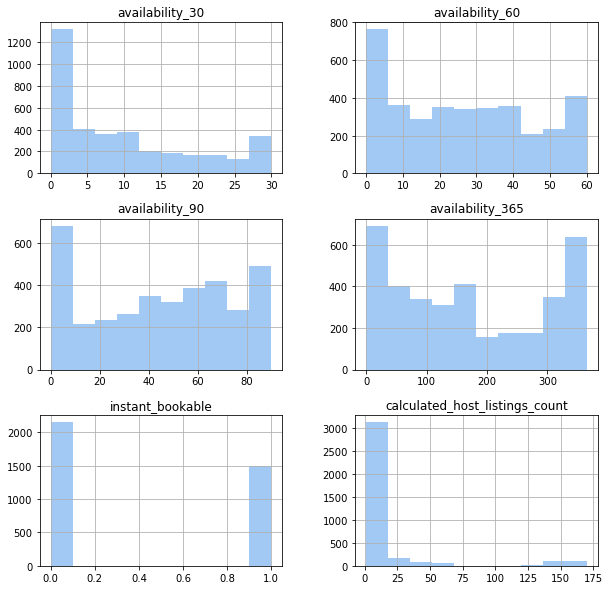

In [69]:
df.loc[:, 'availability_30' : 'calculated_host_listings_count'].hist(figsize=(10,10));

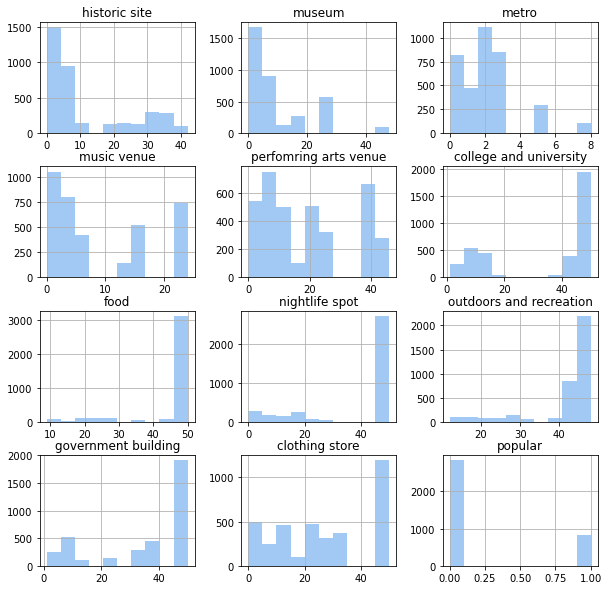

In [70]:
df.loc[:, 'historic site' : 'popular'].hist(figsize=(10,10));

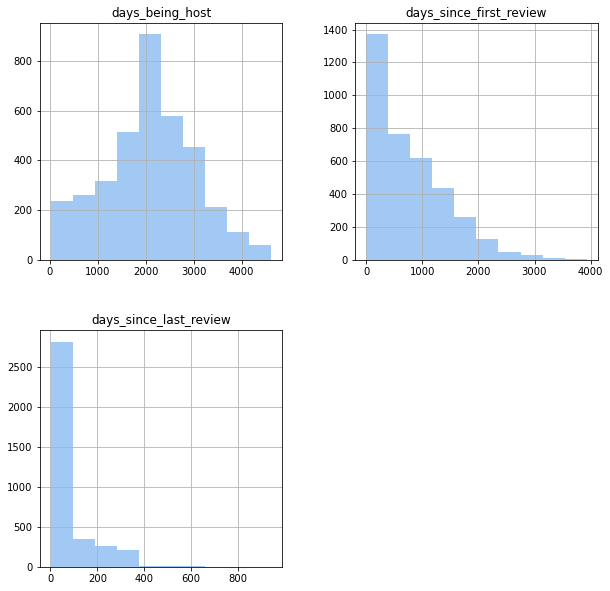

In [71]:
df.loc[:, 'days_being_host' : 'days_since_last_review'].hist(figsize=(10,10));

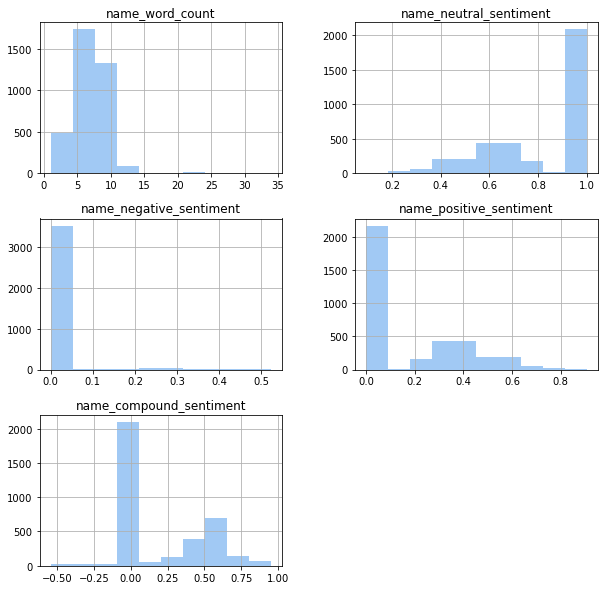

In [72]:
df.loc[:, 'name_word_count' : 'name_compound_sentiment'].hist(figsize=(10,10));

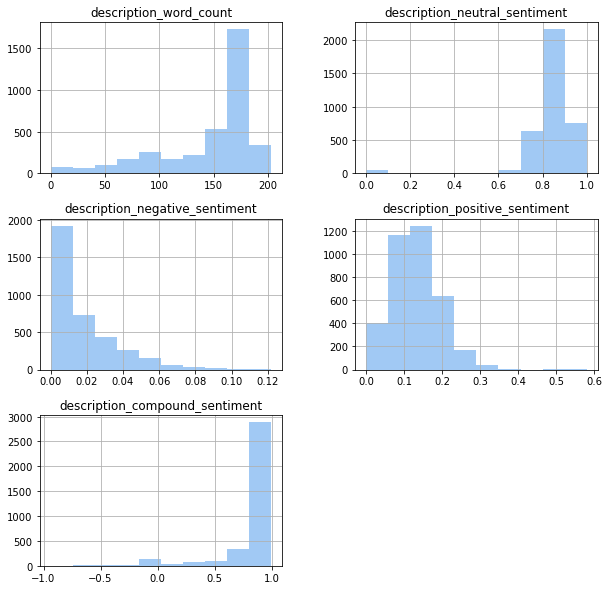

In [73]:
df.loc[:, 'description_word_count' : 'description_compound_sentiment'].hist(figsize=(10,10));

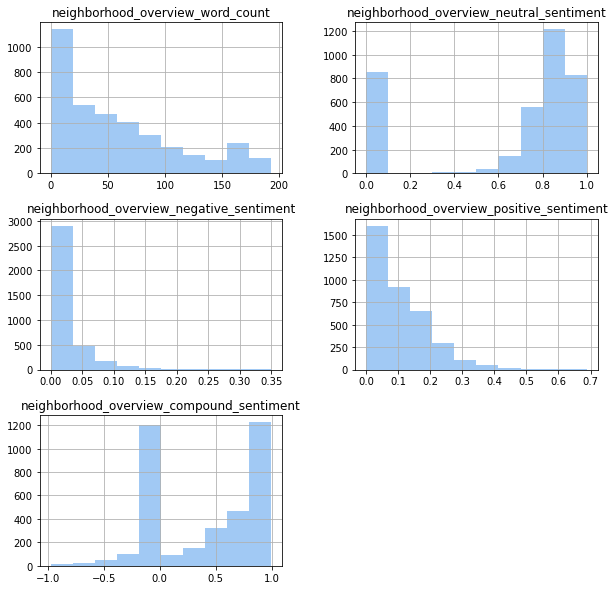

In [74]:
df.loc[:, 'neighborhood_overview_word_count' : 'neighborhood_overview_compound_sentiment'].hist(figsize=(10,10));

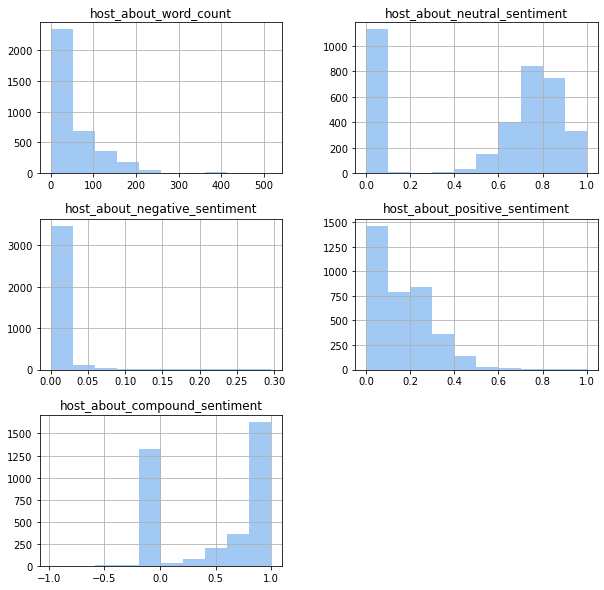

In [75]:
df.loc[:, 'host_about_word_count' : 'host_about_compound_sentiment'].hist(figsize=(10,10));

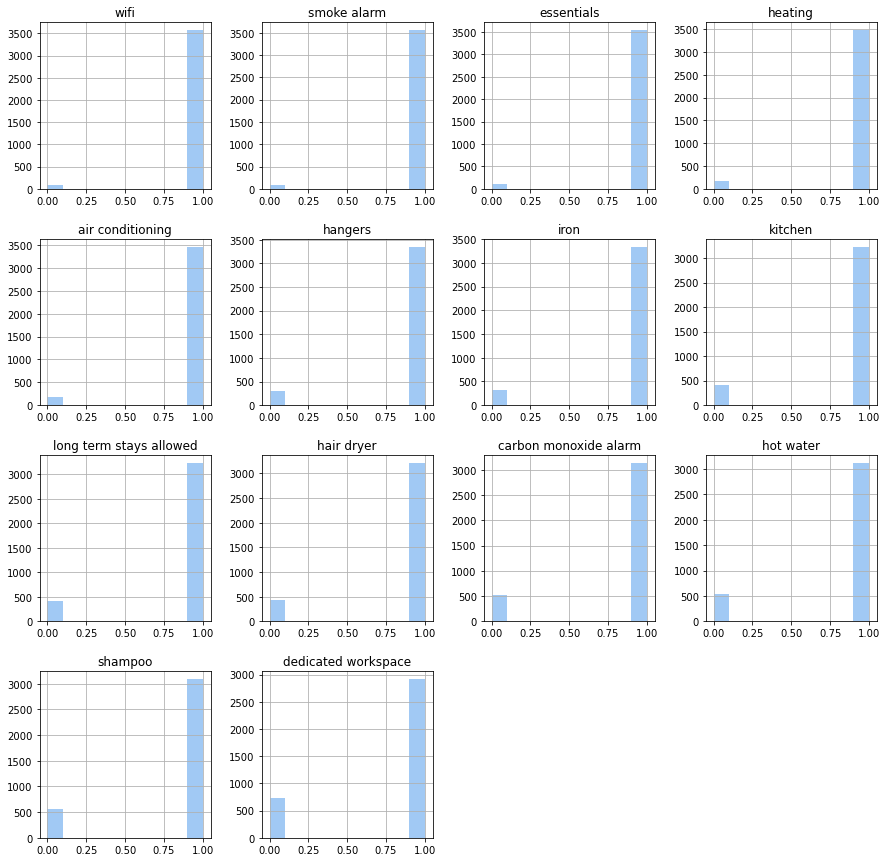

In [79]:
df.loc[:, 'wifi' :'dedicated workspace'].hist(figsize=(15,15));

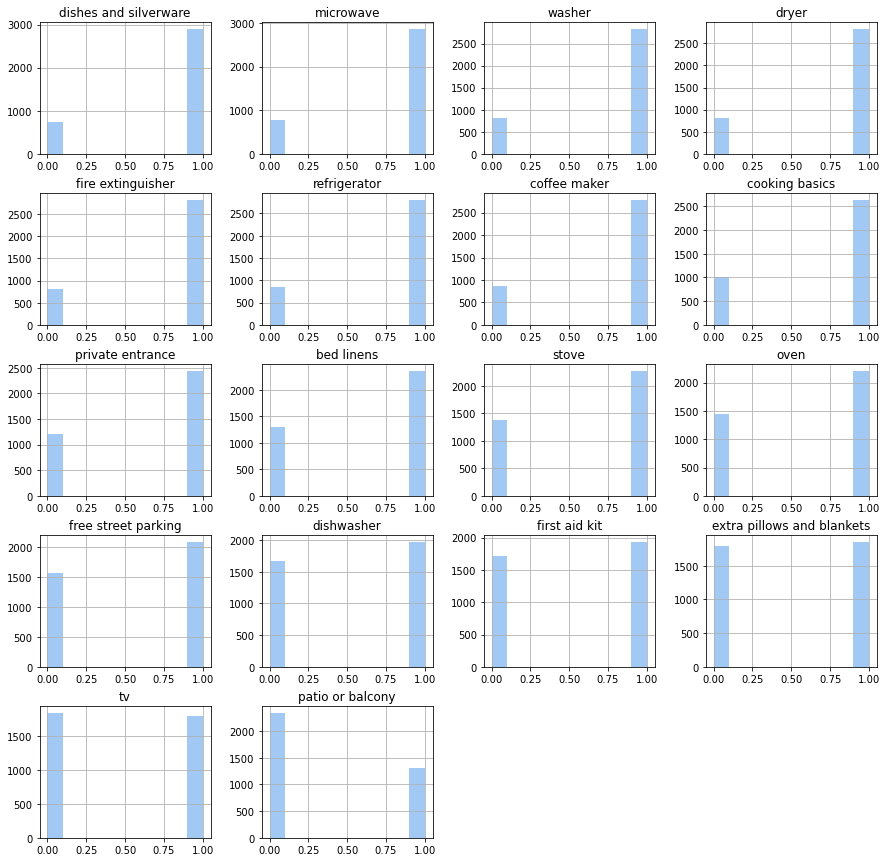

In [78]:
df.loc[:, 'dishes and silverware' :'patio or balcony'].hist(figsize=(15,15));

Below I will look at the correlation of all the variables in the dataset with the popular target variable. In the chart directly below, we see that the most correlated variables with popularity are days since first review, if the host is a super host, and if a coffee maker is included in the amenities. 

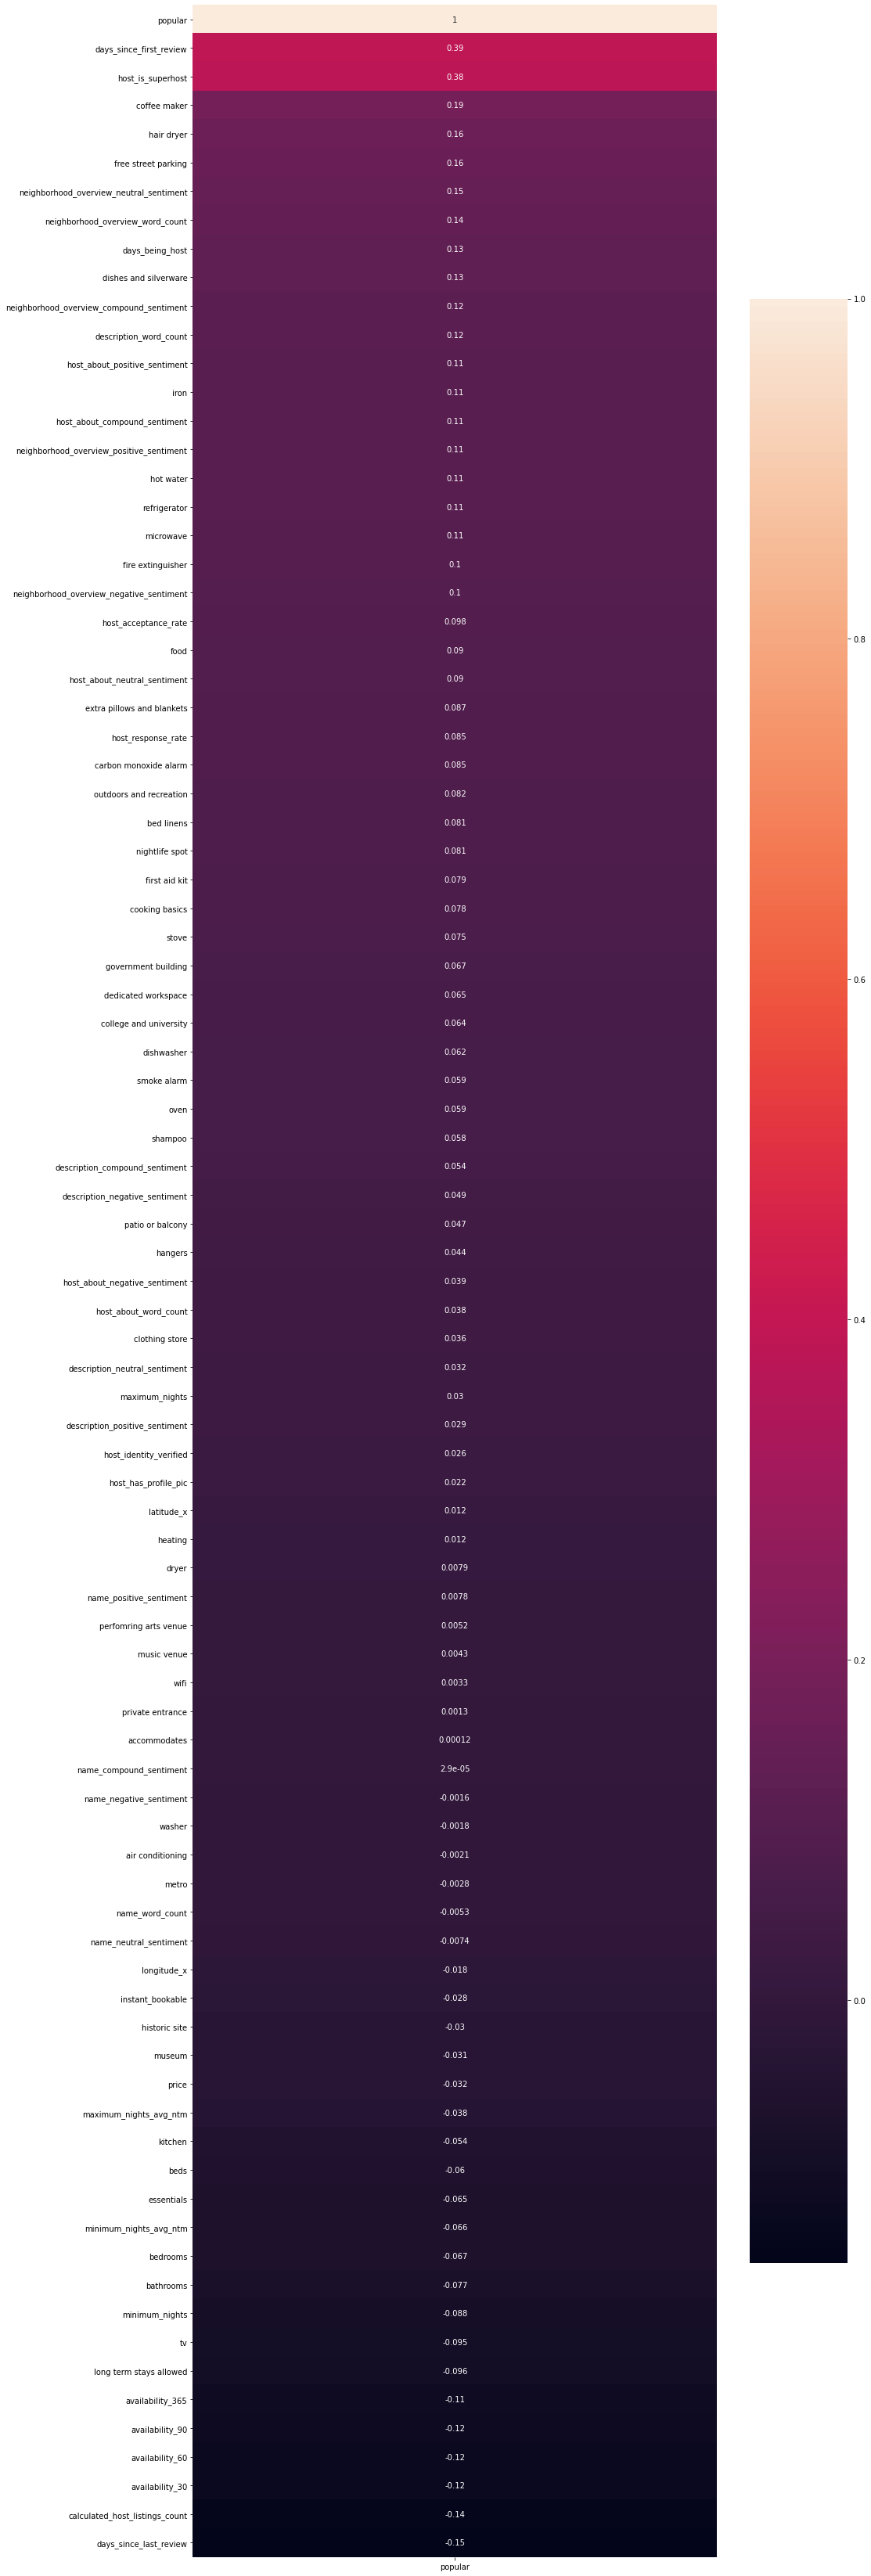

In [101]:
plt.figure(figsize=(15,60));
sns.heatmap(df.corr()[['popular']].sort_values('popular', ascending=False), annot=True);

In [102]:
df.corr()

host_response_rate  \
host_response_rate                                  1.000000   
host_acceptance_rate                                0.327761   
host_is_superhost                                   0.189851   
host_has_profile_pic                                0.019194   
host_identity_verified                             -0.013376   
latitude_x                                         -0.031888   
longitude_x                                         0.016441   
accommodates                                        0.026782   
bathrooms                                          -0.003904   
bedrooms                                            0.011907   
beds                                                0.037140   
price                                               0.012104   
minimum_nights                                     -0.008036   
maximum_nights                                     -0.000447   
minimum_nights_avg_ntm                              0.019711   
maximum_nights_avg_ntm                             -0.009389   
availability_30                                    -0.065261   
availability_60                                    -0.053845   
availability_90                                    -0.048218   
availability_365                                   -0.017429   
instant_bookable                                    0.063949   
calculated_host_listings_count                      0.043040   
historic site                                      -0.009280   
museum                                             -0.007538   
metro                                              -0.004813   
music venue                                         0.013455   
perfomring arts venue                              -0.010912   
college and university                              0.017167   
food                                                0.026076   
nightlife spot                                      0.043923   
outdoors and recreation                             0.024346   
government building                                 0.044096   
clothing store                                      0.019395   
popular                                             0.085377   
days_being_host                                     0.068229   
days_since_first_review                             0.038535   
days_since_last_review                             -0.133441   
name_word_count                                     0.065241   
name_neutral_sentiment                             -0.028471   
name_negative_sentiment                            -0.003651   
name_positive_sentiment                             0.029419   
name_compound_sentiment                             0.037284   
description_word_count                              0.132096   
description_neutral_sentiment                       0.039860   
description_negative_sentiment                      0.036643   
description_positive_sentiment                      0.005620   
description_compound_sentiment                      0.025285   
neighborhood_overview_word_count                    0.074552   
neighborhood_overview_neutral_sentiment             0.075337   
neighborhood_overview_negative_sentiment            0.033649   
neighborhood_overview_positive_sentiment            0.028319   
neighborhood_overview_compound_sentiment            0.035721   
host_about_word_count                               0.081501   
host_about_neutral_sentiment                        0.098558   
host_about_negative_sentiment                       0.029255   
host_about_positive_sentiment                       0.067617   
host_about_compound_sentiment                       0.090026   
wifi                                               -0.028378   
smoke alarm                                         0.012996   
essentials                                         -0.011591   
heating                                            -0.032119   
air conditioning                                   -0.040635   
hangers   

In the heatmap below, we see that there is not to much correlation between variables except for the amenities offered which makes sense. 

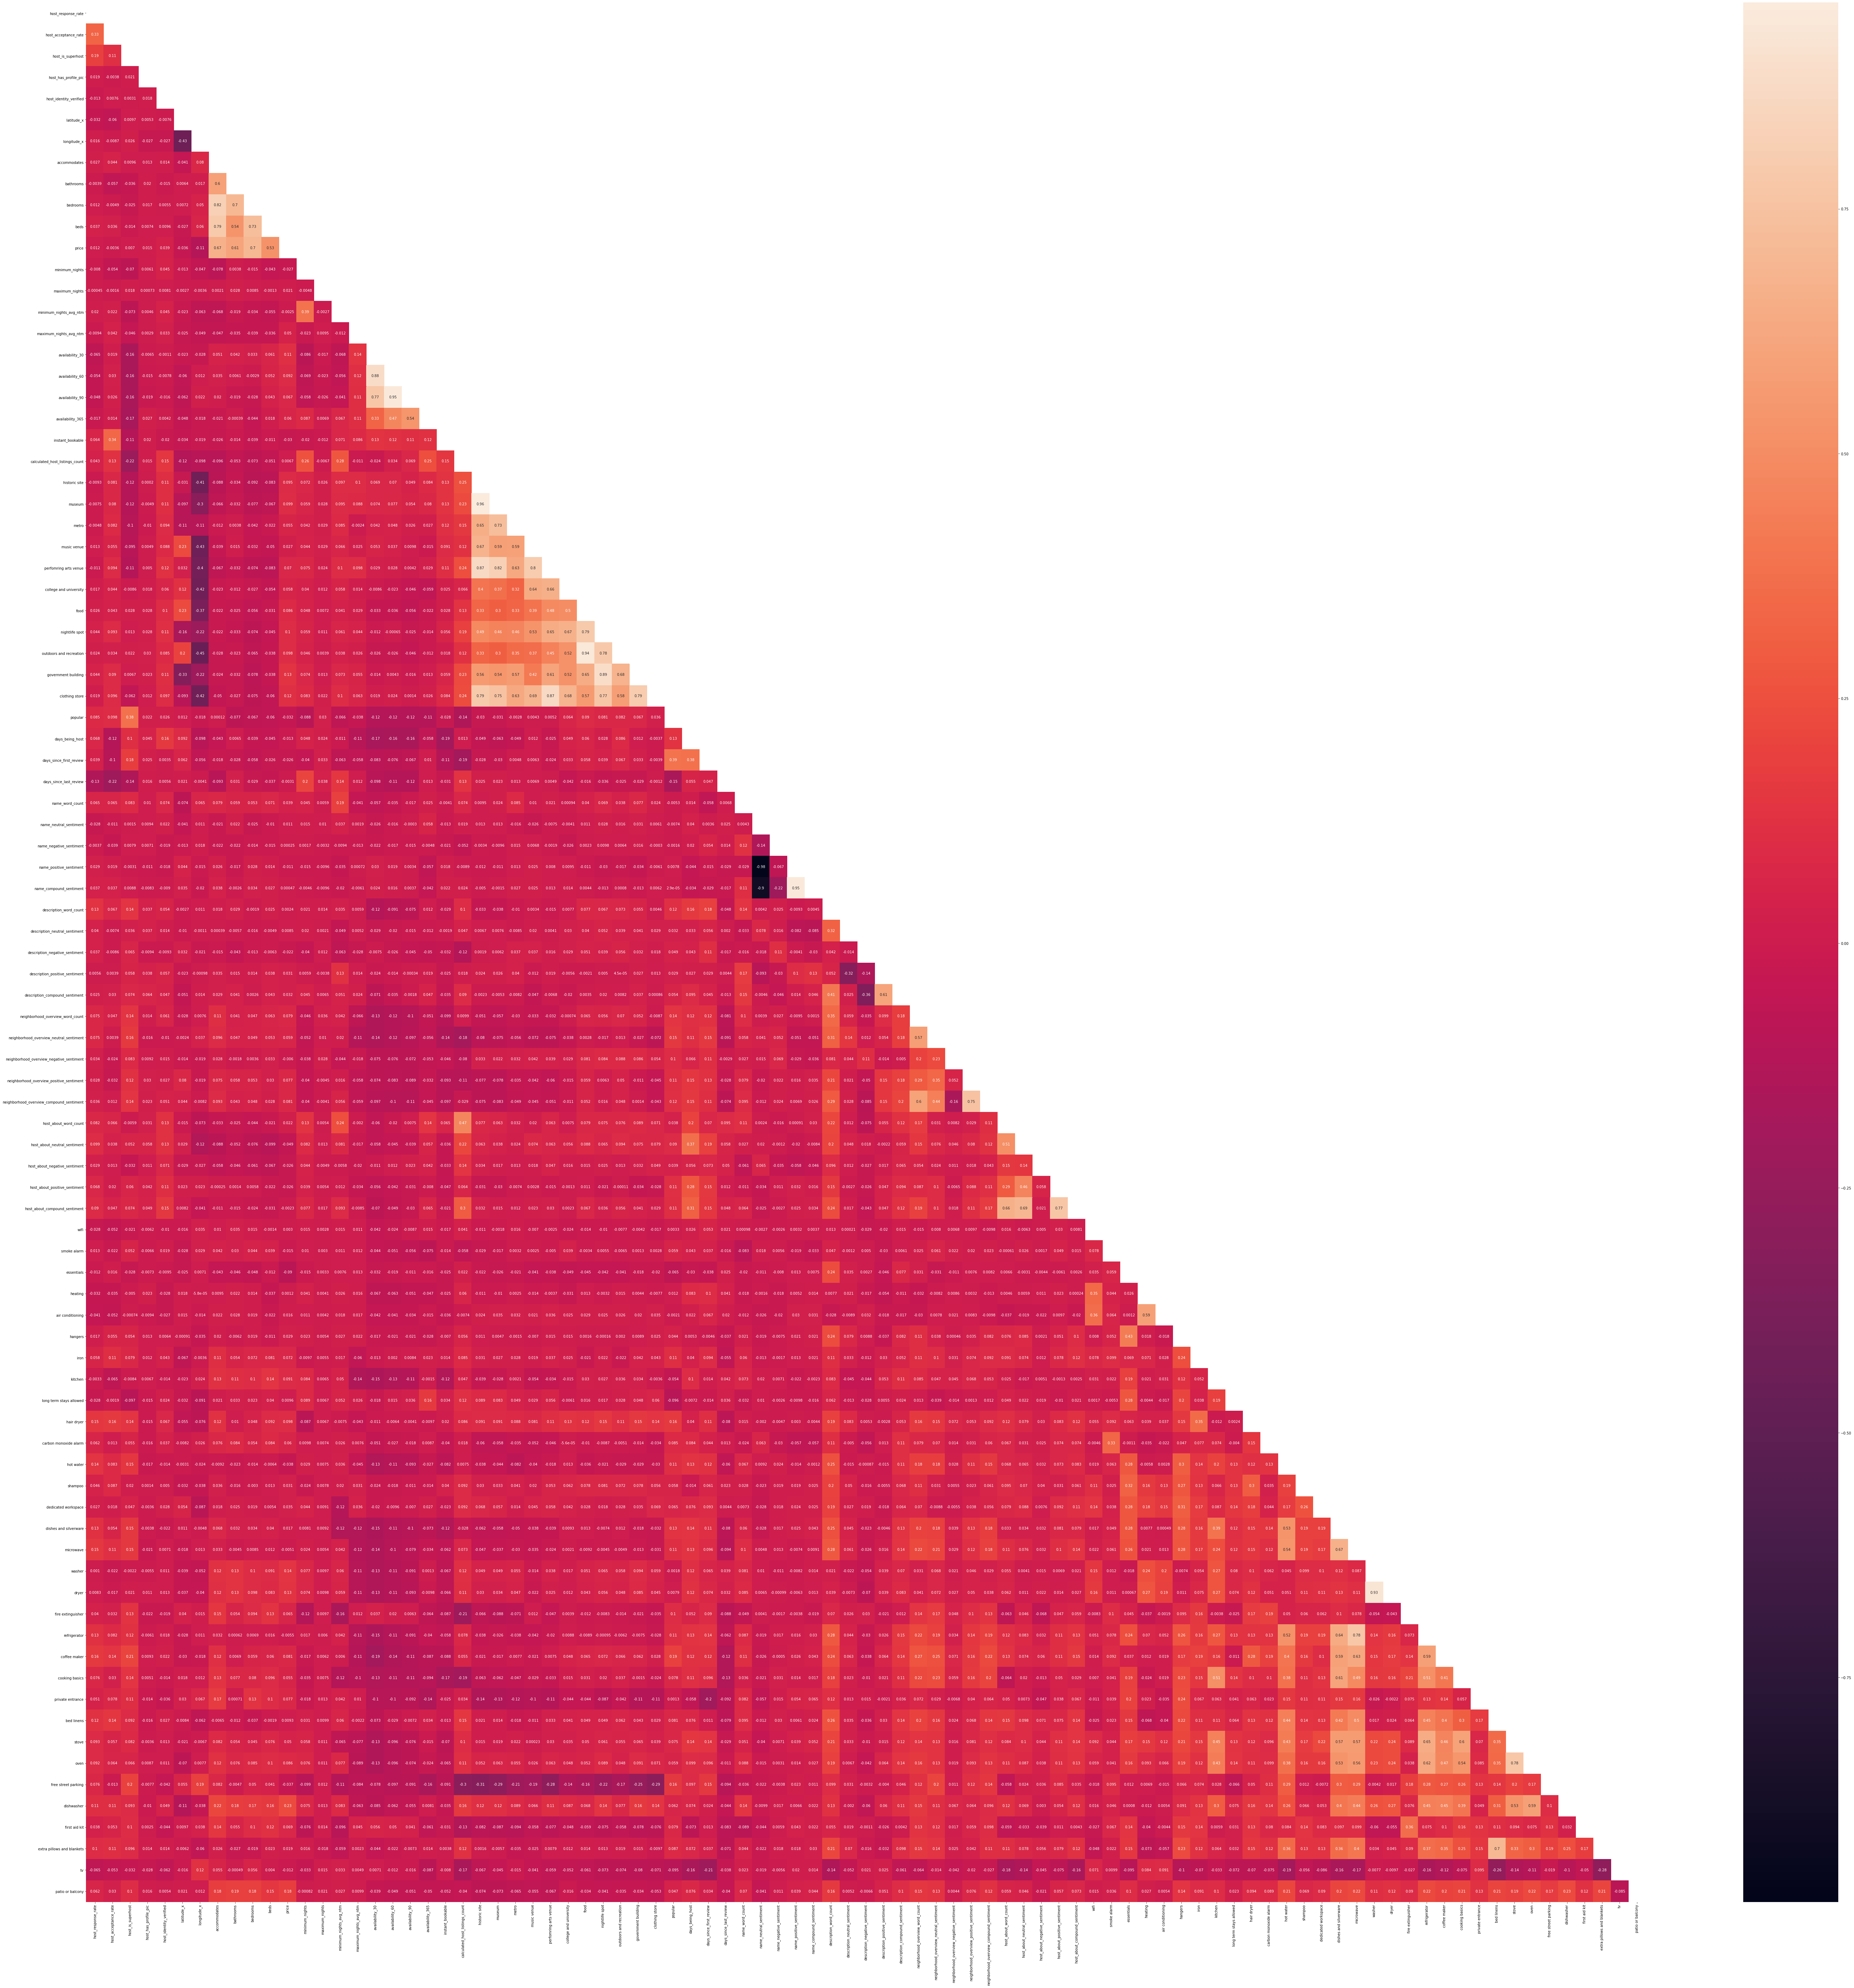

In [105]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(100,100))
sns.heatmap(df.corr(), annot=True, mask=mask);

Below, I will look plot the variables most correlated with popularity against the popular variable to see their relationships.

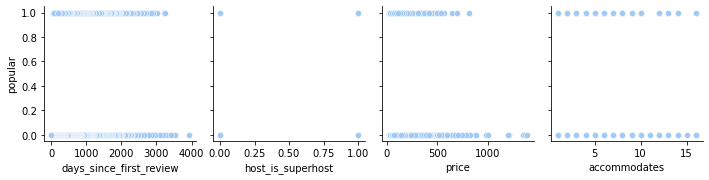

In [107]:
sns.pairplot(df, x_vars = 
            ['days_since_first_review', 'host_is_superhost', 'price', 'accommodates'],
            y_vars=['popular']);

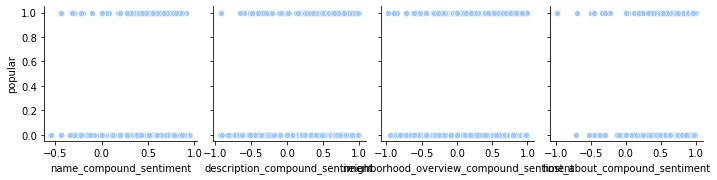

In [109]:
sns.pairplot(df, x_vars = 
            ['name_compound_sentiment', 'description_compound_sentiment', 
             'neighborhood_overview_compound_sentiment', 'host_about_compound_sentiment'],
            y_vars=['popular']);

The compound sentiments above for all of the text columns are more populated with values closer to 1 for the popular line compared to not popular. This shows that the popular listings have a more positive rating overall. 

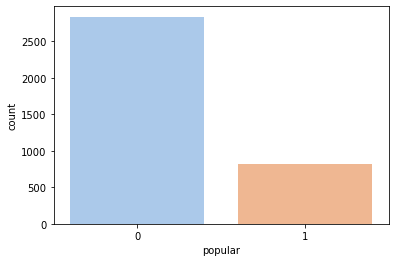

In [125]:
sns.countplot( x = 'popular', data=df, orient='v');

plt

Below are printouts of count of listings showing counts of amenities and popularity. 

In [127]:
amen_list =   ['wifi', 'smoke alarm', 'essentials', 'heating', 'air conditioning',
       'hangers', 'iron', 'kitchen', 'long term stays allowed', 'hair dryer',
       'carbon monoxide alarm', 'hot water', 'shampoo', 'dedicated workspace',
       'dishes and silverware', 'microwave', 'washer', 'dryer',
       'fire extinguisher', 'refrigerator', 'coffee maker', 'cooking basics',
       'private entrance', 'bed linens', 'stove', 'oven',
       'free street parking', 'dishwasher', 'first aid kit',
       'extra pillows and blankets', 'tv', 'patio or balcony']

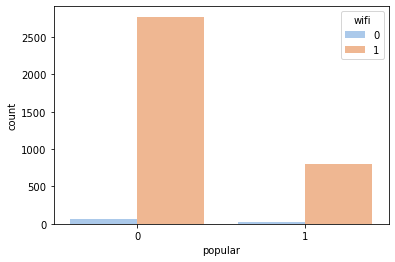

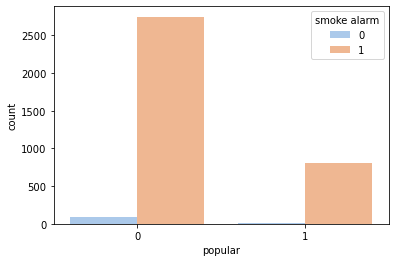

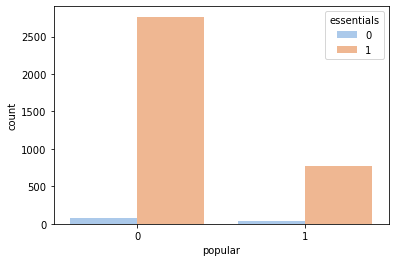

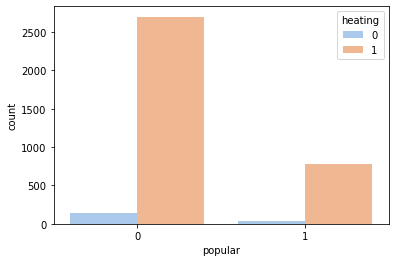

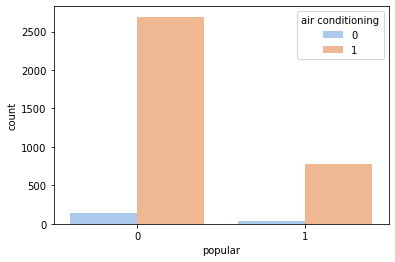

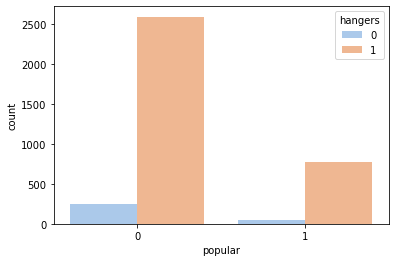

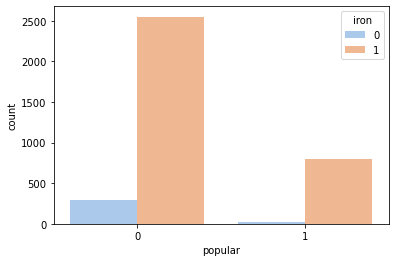

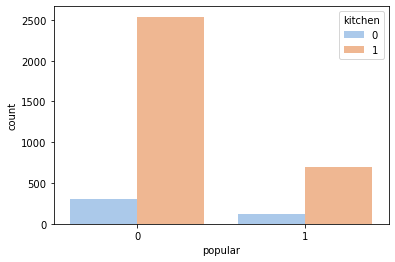

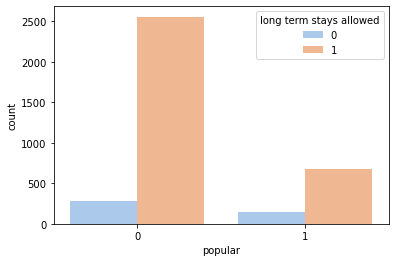

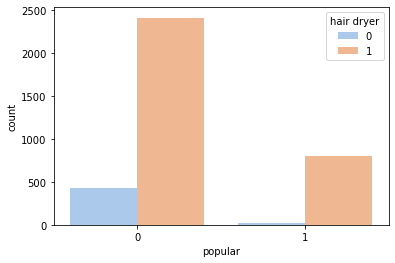

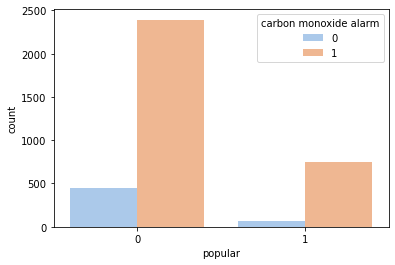

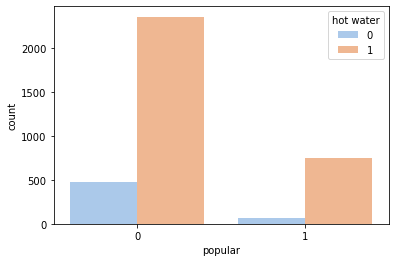

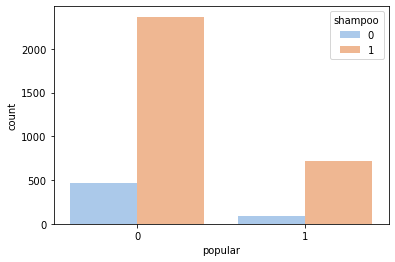

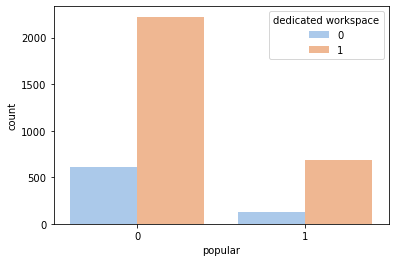

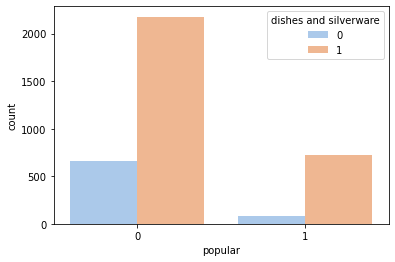

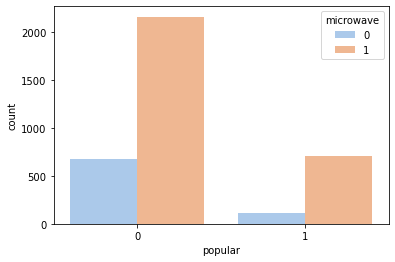

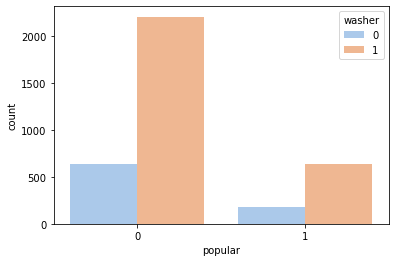

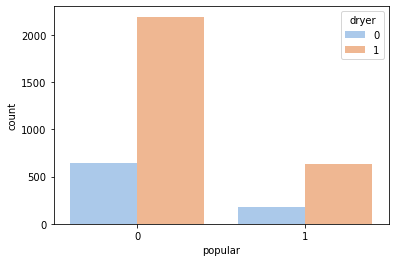

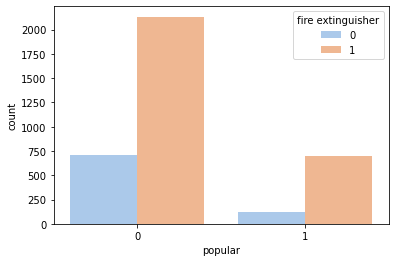

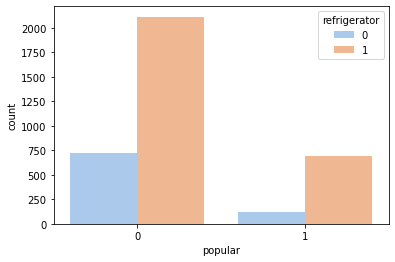

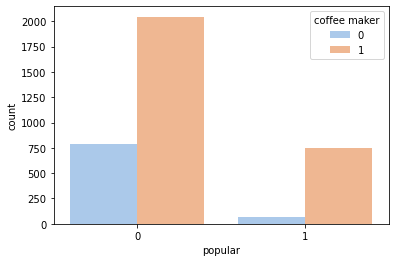

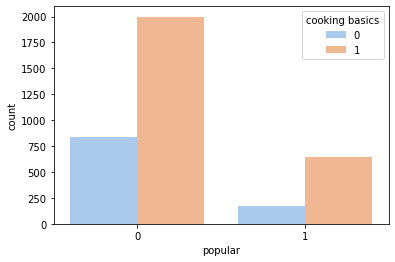

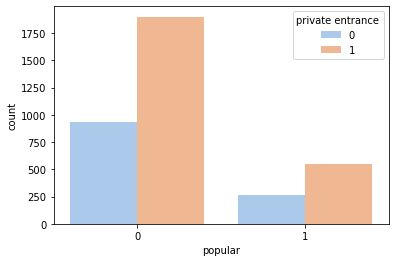

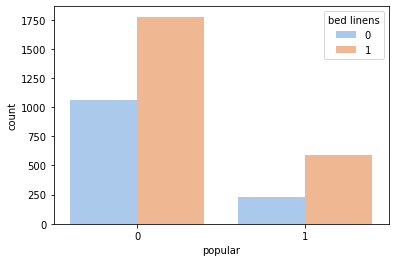

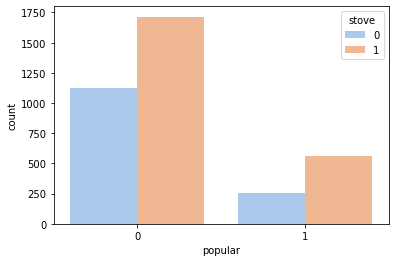

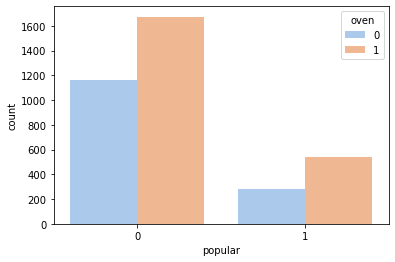

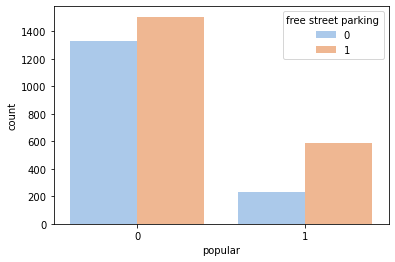

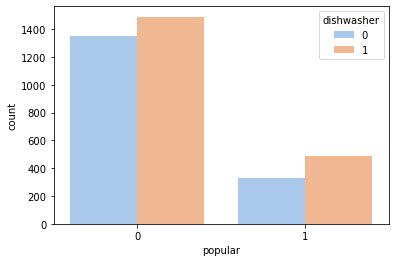

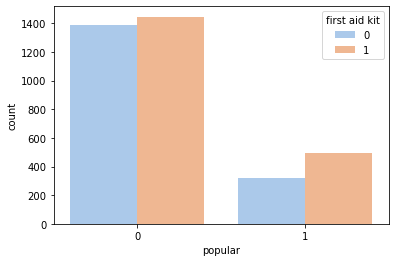

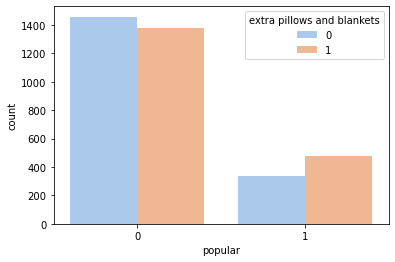

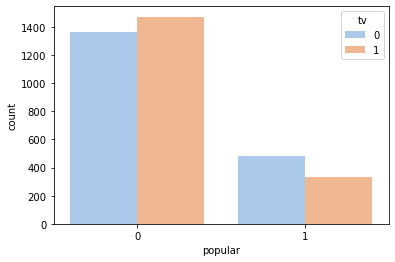

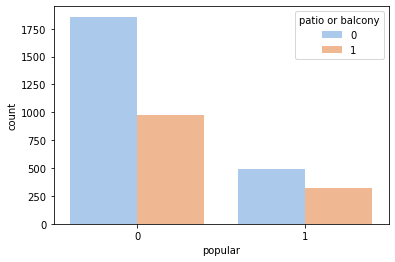

In [137]:
for i in range(0, len(amen_list)):    
    sns.countplot(hue = amen_list[i] , x = 'popular', data=df );
    plt.show();

The amenities at the top of the graphs are more necessities and almost all listings have them. The amenities towards the bottom of the print out are more varried. However, it appears that popular listings mostly have all of the amenities besides patio and tv. 

Lastly, I will look at some of the patterns in the text fields (name, description, neighborhood description, and host about) to see if there are difference between the popular and non-popular listings. I created separate data frames to explore this. 

In [210]:
popular = df[df['popular']==1]

In [211]:
not_popular = df[df['popular']==0]

Instantiate Count Vectorizer to look at word frequency in text fields. Create custom stop words and remove them. 

In [223]:
stop_words = ['b', 'br', 's']

In [224]:
stop_english = stopwords.words('english')

In [225]:
stop = stop_words + stop_english

In [226]:
cvec = CountVectorizer(stop_words=stop, max_features=1000)

Most common words in popular listing names. 

In [227]:
cvec.fit(popular['name'])

transformed = cvec.transform(popular['name'])

transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

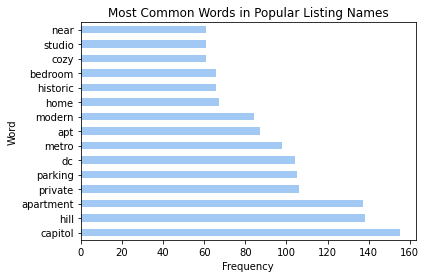

In [228]:
transformed_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.title('Most Common Words in Popular Listing Names')
plt.xlabel('Frequency')
plt.ylabel('Word');

Most common words in non-popular listing names.

In [229]:
cvec.fit(not_popular['name'])

transformed = cvec.transform(not_popular['name'])

transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

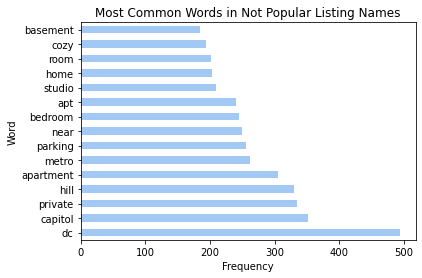

In [230]:
transformed_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.title('Most Common Words in Not Popular Listing Names')
plt.xlabel('Frequency')
plt.ylabel('Word');

The most common words in all listings.

In [231]:
cvec.fit(df['name'])

transformed = cvec.transform(df['name'])

transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

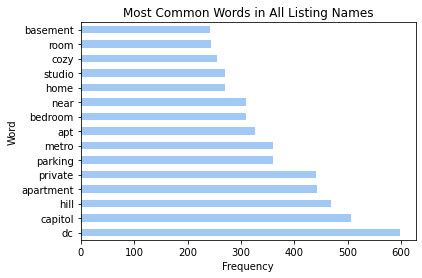

In [232]:
transformed_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.title('Most Common Words in All Listing Names')
plt.xlabel('Frequency')
plt.ylabel('Word');

There are not major differences in words used in listing names for popular and not popular. However, it appears that a few words such as modern or historic are used more frequently in popular listings. 

Most common words in popular listing description.

In [233]:
cvec.fit(popular['description'])

transformed = cvec.transform(popular['description'])

transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

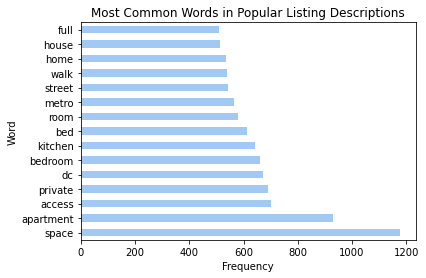

In [234]:
transformed_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.title('Most Common Words in Popular Listing Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Word');

Most common words in non-popular listing description.

In [235]:
cvec.fit(not_popular[not_popular['description'].isna()==False]['description'])

transformed = cvec.transform(not_popular[not_popular['description'].isna()==False]['description'])

transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

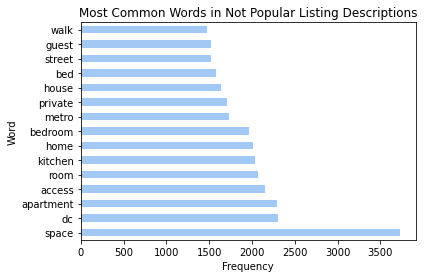

In [236]:
transformed_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.title('Most Common Words in Not Popular Listing Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Word');

Most common words in all descriptions.

In [237]:
cvec.fit(df[df['description'].isna()==False]['description'])

transformed = cvec.transform(df[df['description'].isna()==False]['description'])

transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

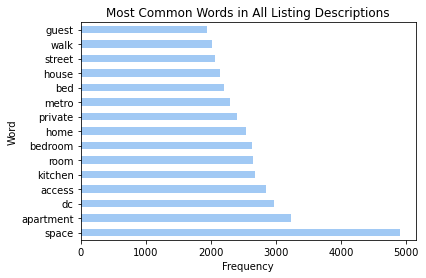

In [238]:
transformed_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.title('Most Common Words in All Listing Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Word');

Try with bi-grams for listing descriptions.

In [239]:
cvec = CountVectorizer(stop_words=stop, ngram_range=(2,2), max_features=1000)

Popular listing description bi-grams.

In [240]:
cvec.fit(popular[popular['description'].isna()==False]['description'])

transformed = cvec.transform(popular[popular['description'].isna()==False]['description'])

transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

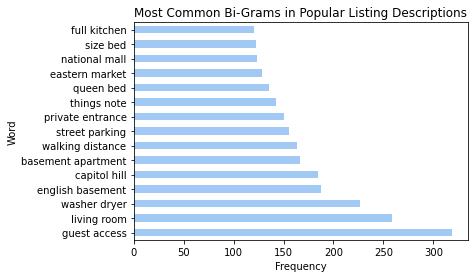

In [241]:
transformed_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.title('Most Common Bi-Grams in Popular Listing Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Word');

Not-popular listing description bi-grams.

In [242]:
cvec.fit(not_popular[not_popular['description'].isna()==False]['description'])

transformed = cvec.transform(not_popular[not_popular['description'].isna()==False]['description'])

transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

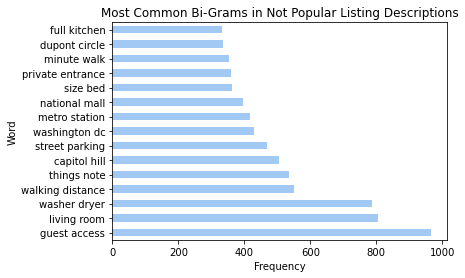

In [243]:
transformed_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.title('Most Common Bi-Grams in Not Popular Listing Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Word');

Most common bi-grams in all listing descriptions

In [244]:
cvec.fit(df[df['description'].isna()==False]['description'])

transformed = cvec.transform(df[df['description'].isna()==False]['description'])

transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

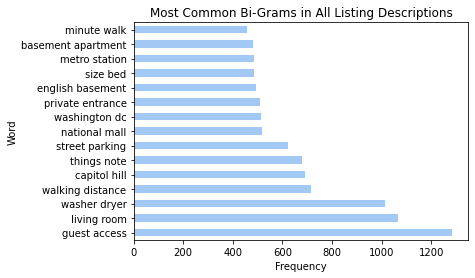

In [246]:
transformed_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.title('Most Common Bi-Grams in All Listing Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Word');

Popular neighborhood description bi-grams.

In [254]:
cvec.fit(popular[popular['neighborhood_overview'].isna()==False]['neighborhood_overview'])

transformed = cvec.transform(popular[popular['neighborhood_overview'].isna()==False]['neighborhood_overview'])

transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

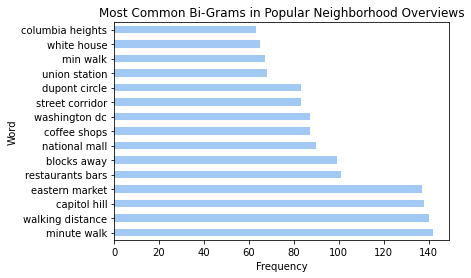

In [255]:
transformed_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.title('Most Common Bi-Grams in Popular Neighborhood Overviews')
plt.xlabel('Frequency')
plt.ylabel('Word');

Not popular neighborhood description bi-grams.

In [256]:
cvec.fit(not_popular[not_popular['neighborhood_overview'].isna()==False]['neighborhood_overview'])

transformed = cvec.transform(not_popular[not_popular['neighborhood_overview'].isna()==False]['neighborhood_overview'])

transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

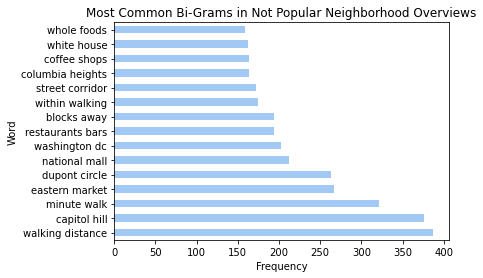

In [257]:
transformed_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.title('Most Common Bi-Grams in Not Popular Neighborhood Overviews')
plt.xlabel('Frequency')
plt.ylabel('Word');

All neighborhood description bi-grams.

In [259]:
cvec.fit(df[df['neighborhood_overview'].isna()==False]['neighborhood_overview'])

transformed = cvec.transform(df[df['neighborhood_overview'].isna()==False]['neighborhood_overview'])

transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

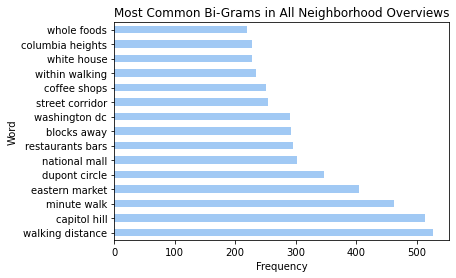

In [261]:
transformed_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.title('Most Common Bi-Grams in All Neighborhood Overviews')
plt.xlabel('Frequency')
plt.ylabel('Word');

Try most frequent unigrams for neighborhood overviews. 

In [263]:
cvec = CountVectorizer(stop_words=stop, max_features=1000)

Popular listings neighborhood overviews. 

In [267]:
cvec.fit(popular[popular['neighborhood_overview'].isna()==False]['neighborhood_overview'])

transformed = cvec.transform(popular[popular['neighborhood_overview'].isna()==False]['neighborhood_overview'])

transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

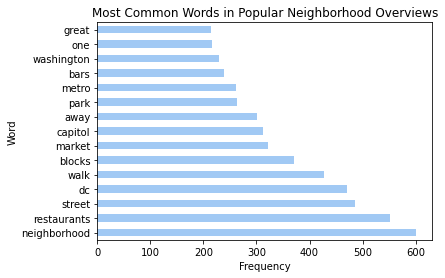

In [269]:
transformed_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.title('Most Common Words in Popular Neighborhood Overviews')
plt.xlabel('Frequency')
plt.ylabel('Word');

Not popular listings neighborhood overviews.

In [272]:
cvec.fit(not_popular[not_popular['neighborhood_overview'].isna()==False]['neighborhood_overview'])

transformed = cvec.transform(not_popular[not_popular['neighborhood_overview'].isna()==False]['neighborhood_overview'])

transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

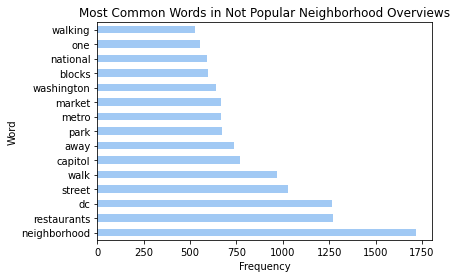

In [273]:
transformed_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.title('Most Common Words in Not Popular Neighborhood Overviews')
plt.xlabel('Frequency')
plt.ylabel('Word');

All listings neighborhood overviews.

In [264]:
cvec.fit(df[df['neighborhood_overview'].isna()==False]['neighborhood_overview'])

transformed = cvec.transform(df[df['neighborhood_overview'].isna()==False]['neighborhood_overview'])

transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

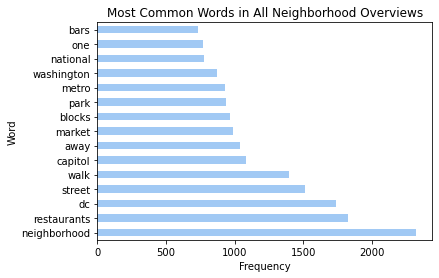

In [266]:
transformed_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.title('Most Common Words in All Neighborhood Overviews')
plt.xlabel('Frequency')
plt.ylabel('Word');

Most common words used in the host about description for popular listings. 

In [275]:
cvec.fit(popular[popular['host_about'].isna()==False]['host_about'])

transformed = cvec.transform(popular[popular['host_about'].isna()==False]['host_about'])

transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

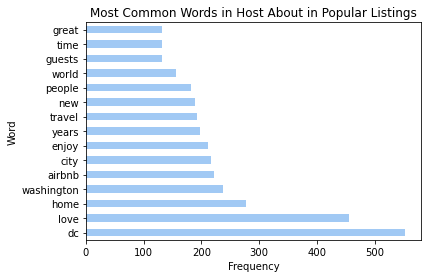

In [277]:
transformed_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.title('Most Common Words in Host About in Popular Listings')
plt.xlabel('Frequency')
plt.ylabel('Word');

Most common words used in the host about description for not popular listings.

In [278]:
cvec.fit(not_popular[not_popular['host_about'].isna()==False]['host_about'])

transformed = cvec.transform(not_popular[not_popular['host_about'].isna()==False]['host_about'])

transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

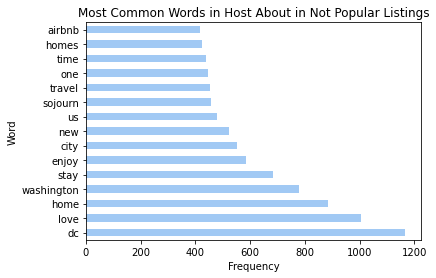

In [279]:
transformed_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.title('Most Common Words in Host About in Not Popular Listings')
plt.xlabel('Frequency')
plt.ylabel('Word');

Most common words in all listings for host about.

In [280]:
cvec.fit(df[df['host_about'].isna()==False]['host_about'])

transformed = cvec.transform(df[df['host_about'].isna()==False]['host_about'])

transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

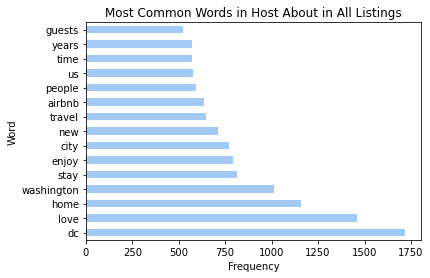

In [282]:
transformed_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.title('Most Common Words in Host About in All Listings')
plt.xlabel('Frequency')
plt.ylabel('Word');

Most common bi-grams used in host about for popular listings. 

In [285]:
cvec = CountVectorizer(stop_words=stop, ngram_range=(2,2), max_features=1000)

In [286]:
cvec.fit(popular[popular['host_about'].isna()==False]['host_about'])

transformed = cvec.transform(popular[popular['host_about'].isna()==False]['host_about'])

transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

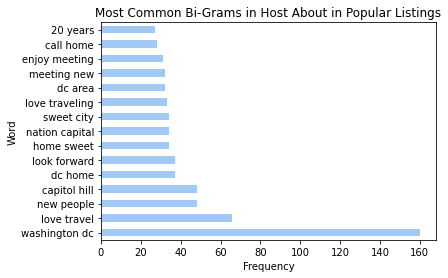

In [287]:
transformed_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.title('Most Common Bi-Grams in Host About in Popular Listings')
plt.xlabel('Frequency')
plt.ylabel('Word');

Most common bi-grams used in host about for not popular listings.

In [288]:
cvec.fit(not_popular[not_popular['host_about'].isna()==False]['host_about'])

transformed = cvec.transform(not_popular[not_popular['host_about'].isna()==False]['host_about'])

transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

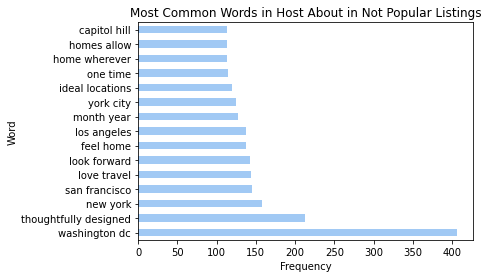

In [289]:
transformed_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.title('Most Common Words in Host About in Not Popular Listings')
plt.xlabel('Frequency')
plt.ylabel('Word');

Most common bi-grams used in host about for all listings.

In [290]:
cvec.fit(df[df['host_about'].isna()==False]['host_about'])

transformed = cvec.transform(df[df['host_about'].isna()==False]['host_about'])

transformed_df = pd.DataFrame(transformed.todense(),
                          columns = cvec.get_feature_names())

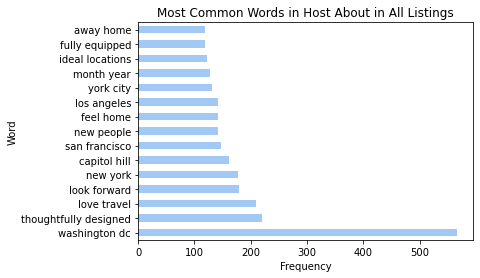

In [291]:
transformed_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.title('Most Common Words in Host About in All Listings')
plt.xlabel('Frequency')
plt.ylabel('Word');

In [ ]:
#geo data for maps? lat lon on map?

In [ ]:
with open('../data/Neighborhood_Clusters.geojson') as f:
    dc_data = json.load(f)

In [ ]:
dc_data